In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
import os
os.chdir("../checkpoints")

In [3]:
# jzhang: 查找不同步的中间结果，格式为{epoch}.{step}
check_pt = "0.315"

## Predicting Test Data

In [4]:
test_result = pd.read_csv("test_result." + check_pt, header=None, sep="\t")
test_result.columns=['sentence', 'pred_ner', 'predict_prob']
test_result.head()

,sentence,pred_ner,predict_prob
0,在 这 里 恕 弟 不 恭 之 罪 ， 敢 在 尊 前 一 诤 ： 前 人 论 书 ， 每 ...,O O O O O O O O O O O O O O O O O O O O O O O ...,0.99987 0.99988 0.99988 0.99980 0.99958 0.9998...
1,按 照 赛 程 ， a 、 b 两 组 的 出 线 球 队 编 为 e 组 ， 在 不 来 ...,O O O O O O O O O O O O O O O O O O O O O B-LO...,0.99982 0.99983 0.99985 0.99976 0.99987 0.9935...
2,今 年 2 月 ， 金 大 中 新 政 府 成 立 后 ， 社 会 舆 论 要 求 惩 治 ...,O O O O O B-ORG I-ORG B-LOC I-LOC O O O O O O ...,0.99987 0.99989 0.99987 0.99990 0.99988 0.8515...
3,在 阿 维 兰 热 任 职 2 4 年 后 ， 国 际 足 联 要 选 举 产 生 一 位 ...,O B-PER I-PER I-PER I-PER O O O O O O O B-ORG ...,0.99986 0.98827 0.97561 0.97334 0.97237 0.9998...
4,通 过 这 一 手 段 ， 客 户 可 将 原 有 债 务 利 率 转 换 成 对 自 己 ...,O O O O O O O O O O O O O O O O O O O O O O O ...,0.99990 0.99990 0.99991 0.99990 0.99990 0.9998...


In [5]:
test_result_stack = []
for row in test_result.itertuples():
    sentence, pred_ner, predict_prob = getattr(row, "sentence"), getattr(row, "pred_ner"), getattr(row, "predict_prob")
    sentence = sentence.strip().split(" ")
    pred_ner = pred_ner.strip().split(" ")
    predict_prob = predict_prob.strip().split(" ")
    np_row = np.stack([sentence, pred_ner, predict_prob], axis=1)
    test_result_stack.append(np_row)

In [6]:
test_result_stack[13]

array([['本', 'O', '0.99905'],
       ['报', 'O', '0.99928'],
       ['波', 'B-LOC', '0.99369'],
       ['恩', 'I-LOC', '0.97936'],
       ['5', 'O', '0.99968'],
       ['月', 'O', '0.99975'],
       ['2', 'O', '0.99977'],
       ['5', 'O', '0.99968'],
       ['日', 'O', '0.99968'],
       ['电', 'O', '0.99968'],
       ['记', 'O', '0.99964'],
       ['者', 'O', '0.99955'],
       ['江', 'B-PER', '0.99744'],
       ['建', 'I-PER', '0.99884'],
       ['国', 'I-PER', '0.99844'],
       ['报', 'O', '0.99964'],
       ['道', 'O', '0.99973'],
       ['：', 'O', '0.99978'],
       ['由', 'O', '0.99968'],
       ['网', 'O', '0.99562'],
       ['坛', 'O', '0.99920'],
       ['老', 'O', '0.99965'],
       ['将', 'O', '0.99980'],
       ['鲍', 'B-PER', '0.99531'],
       ['里', 'I-PER', '0.99690'],
       ['斯', 'I-PER', '0.99685'],
       ['[UNK]', 'I-PER', '0.99092'],
       ['贝', 'I-PER', '0.94520'],
       ['克', 'I-PER', '0.99792'],
       ['尔', 'I-PER', '0.99736'],
       ['率', 'O', '0.99968'],
       ['领', 'O', 

## Learning Curves

In [7]:
with open('learning_curves.' + check_pt + '.pkl', 'rb') as f:
    learning_curves = pickle.load(f)

In [8]:
learning_curves

{'train': [{'epoch': 0,
   'step': 1,
   'loss': 1.0576601,
   'f1': 0.0031249999999999997,
   'precision': 0.0016420361247947454,
   'recall': 0.03225806451612903},
  {'epoch': 0,
   'step': 2,
   'loss': 0.88607335,
   'f1': 0.0,
   'precision': 0.0,
   'recall': 0.0},
  {'epoch': 0,
   'step': 3,
   'loss': 0.3477881,
   'f1': 0.0,
   'precision': 0.0,
   'recall': 0.0},
  {'epoch': 0,
   'step': 4,
   'loss': 0.3402619,
   'f1': 0.0,
   'precision': 0.0,
   'recall': 0.0},
  {'epoch': 0,
   'step': 5,
   'loss': 0.24721707,
   'f1': 0.0,
   'precision': 0.0,
   'recall': 0.0},
  {'epoch': 0,
   'step': 6,
   'loss': 0.2857613,
   'f1': 0.0,
   'precision': 0.0,
   'recall': 0.0},
  {'epoch': 0,
   'step': 7,
   'loss': 0.19905753,
   'f1': 0.0,
   'precision': 0.0,
   'recall': 0.0},
  {'epoch': 0,
   'step': 8,
   'loss': 0.13871345,
   'f1': 0.0,
   'precision': 0.0,
   'recall': 0.0},
  {'epoch': 0,
   'step': 9,
   'loss': 0.13722582,
   'f1': 0.0,
   'precision': 0.0,
   'reca

In [9]:
lc_train = pd.DataFrame(learning_curves['train'])
lc_val = pd.DataFrame(learning_curves['val'])

In [10]:
lc_train

,epoch,f1,loss,precision,recall,step
0,0,0.003125,1.057660,0.001642,0.032258,1
1,0,0.000000,0.886073,0.000000,0.000000,2
2,0,0.000000,0.347788,0.000000,0.000000,3
3,0,0.000000,0.340262,0.000000,0.000000,4
4,0,0.000000,0.247217,0.000000,0.000000,5
5,0,0.000000,0.285761,0.000000,0.000000,6
6,0,0.000000,0.199058,0.000000,0.000000,7
7,0,0.000000,0.138713,0.000000,0.000000,8
8,0,0.000000,0.137226,0.000000,0.000000,9
9,0,0.000000,0.086862,0.000000,0.000000,10


In [11]:
lc_val

,epoch,f1,loss,precision,recall,step
0,0,0.000000,0.194664,0.000000,0.000000,5
1,0,0.040956,0.115491,0.088235,0.026667,10
2,0,0.387097,0.077831,0.375000,0.400000,15
3,0,0.567901,0.059290,0.528736,0.613333,20
4,0,0.583178,0.049445,0.503226,0.693333,25
5,0,0.643154,0.033465,0.603113,0.688889,30
6,0,0.645030,0.033242,0.593284,0.706667,35
7,0,0.673307,0.033755,0.610108,0.751111,40
8,0,0.755459,0.026339,0.742489,0.768889,45
9,0,0.773626,0.024627,0.765217,0.782222,50


In [12]:
def plotLearningCurves(ind):
    plt.plot(lc_train['step'],lc_train[ind])
    plt.plot(lc_val['step'],lc_val[ind])
    if ind=='loss':
        best_step = lc_val[ind].idxmin()
    else:
        best_step = lc_val[ind].idxmax()
    print("Best validation value: {}".format(lc_val[ind][best_step]), end=", ")
    best_step = lc_val['step'][best_step]
    print("At step {}".format(best_step))
    plt.vlines(best_step, 0, 1.0, colors = "r", linestyles = "dashed")
    plt.legend(['Train','Validation'])
    plt.title(ind)
    plt.show()

Best validation value: 0.010270994249731302, At step 305


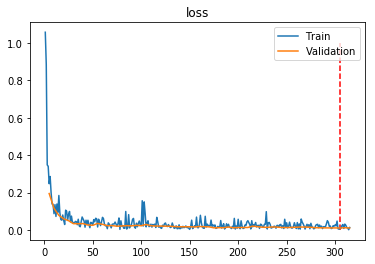

In [13]:
plotLearningCurves("loss")

Best validation value: 0.9115044247787609, At step 175


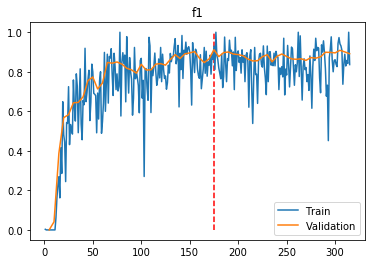

In [14]:
plotLearningCurves("f1")

Best validation value: 0.9074889867841409, At step 175


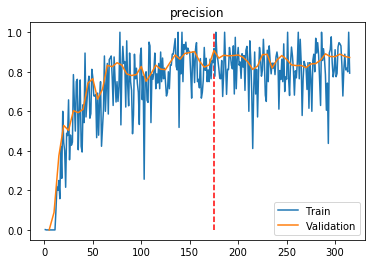

In [15]:
plotLearningCurves("precision")

Best validation value: 0.9288888888888889, At step 305


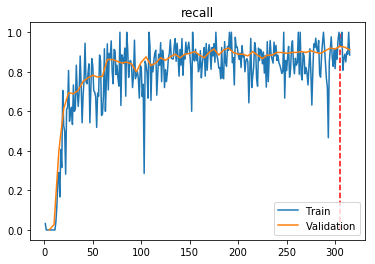

In [16]:
plotLearningCurves("recall")